In [283]:
import re
import bs4
import xbrl
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rickbetzler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rickbetzler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rickbetzler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [135]:
import requests
t = requests.get('https://www.sec.gov/Archives/edgar/data/320193/000032019318000007/a10-qq1201812302017.htm')
text_file = open("/Users/rickbetzler/personal/fun-times-in-python/audit/misc/apple.txt", "w")
text_file.write(t.text)
text_file.close()

In [264]:
import requests
t = requests.get('https://www.sec.gov/Archives/edgar/data/320193/000032019318000007/a10-qq1201812302017.htm')


In [266]:
t.text

'<DOCUMENT>\n<TYPE>10-Q\n<SEQUENCE>1\n<FILENAME>a10-qq1201812302017.htm\n<DESCRIPTION>10-Q\n<TEXT>\n<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<html>\n\t<head>\n\t\t<!-- Document created using Wdesk 1 -->\n\t\t<!-- Copyright 2018 Workiva -->\n\t\t<title>Document</title>\n\t</head>\n\t<body style="font-family:Times New Roman;font-size:10pt;">\n<div><a name="sF054D27B7ADF522CB07B40DC93F442F8"></a></div><div style="line-height:120%;text-align:center;font-size:10pt;"><div style="padding-left:0px;text-indent:0px;line-height:normal;padding-top:10px;"><table cellpadding="0" cellspacing="0" style="font-family:Times New Roman;font-size:10pt;margin-left:auto;margin-right:auto;width:100%;border-collapse:collapse;text-align:left;"><tr><td colspan="1"></td></tr><tr><td style="width:100%;"></td></tr><tr><td style="vertical-align:bottom;padding-left:2px;padding-top:2px;padding-bottom:2px;padding-right:2px;border-top:1px solid #000000;border

In [267]:
t = bs4.BeautifulSoup(t.text, features="html.parser")

In [281]:
for x in t.find_all('text'):
    for y in x.find_all('body'):
        print(y.text)


 UNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549 FORM 10-Q (Mark One)☒ QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the quarterly period ended December 30, 2017or☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the transition period from              to             .Commission File Number: 001-36743 Apple Inc.(Exact name of Registrant as specified in its charter) California 94-2404110(State or other jurisdictionof incorporation or organization) (I.R.S. Employer Identification No.)1 Infinite LoopCupertino, California 95014(Address of principal executive offices) (Zip Code)(408) 996-1010(Registrant’s telephone number, including area code) Indicate by check mark whether the Registrant (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the Registrant was req

In [136]:
raw = open('/Users/rickbetzler/personal/fun-times-in-python/audit/misc/apple.txt').read()
doc = bs4.BeautifulSoup(raw, features="html.parser")

In [137]:
doc = ' '.join(doc.text.split())
doc = re.sub(r"[^a-zA-Z0-9\$\,]+", ' ', doc)
doc = doc.lower().split()

In [138]:
splits = []
for token in doc:
    regex_splits = re.findall(r'([0-9,$]+)|([a-zA-Z]+)', token)
    for regex_split in regex_splits:
        splits.append(''.join(regex_split))
parsed_text = ' '.join(splits)
tokens = nltk.word_tokenize(parsed_text)

In [139]:
stop_words = set(stopwords.words('english'))
tokens = [t for t in tokens if not t in stop_words]

In [180]:
freq = nltk.FreqDist(tokens)
print(freq.most_common(2))

[(',', 1432), ('company', 682)]


In [187]:
df = pd.DataFrame(nltk.pos_tag(tokens), columns=['text', 'pos'])
df[df['pos']=='CD']

,text,pos
0,10,CD
2,1,CD
3,10,CD
5,1201812302017,CD
7,10,CD
16,20549,CD
18,10,CD
21,one,CD
26,13,CD
27,15,CD


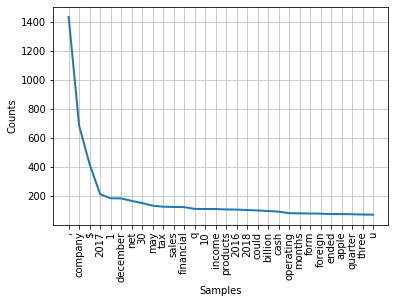

In [182]:
import matplotlib.pyplot as plt
freq.plot(30,cumulative=False)
plt.show()

In [192]:
freq.get('billion')

95

In [193]:
freq.get('consolidated')

55

In [194]:
text.categories()

AttributeError: 'Text' object has no attribute 'categories'

In [195]:
for pair in nltk.bigrams(tokens):
    print(pair)

('10', 'q')
('q', '1')
('1', '10')
('10', 'qq')
('qq', '1201812302017')
('1201812302017', 'htm')
('htm', '10')
('10', 'q')
('q', 'document')
('document', 'united')
('united', 'statessecurities')
('statessecurities', 'exchange')
('exchange', 'commissionwashington')
('commissionwashington', ',')
(',', 'c')
('c', '20549')
('20549', 'form')
('form', '10')
('10', 'q')
('q', 'mark')
('mark', 'one')
('one', 'quarterly')
('quarterly', 'report')
('report', 'pursuant')
('pursuant', 'section')
('section', '13')
('13', '15')
('15', 'securities')
('securities', 'exchange')
('exchange', 'act')
('act', '1934')
('1934', 'quarterly')
('quarterly', 'period')
('period', 'ended')
('ended', 'december')
('december', '30')
('30', ',')
(',', '2017')
('2017', 'transition')
('transition', 'report')
('report', 'pursuant')
('pursuant', 'section')
('section', '13')
('13', '15')
('15', 'securities')
('securities', 'exchange')
('exchange', 'act')
('act', '1934')
('1934', 'transition')
('transition', 'period')
('peri

('amounts', 'outstanding')
('outstanding', 'derivative')
('derivative', 'instruments')
('instruments', 'provide')
('provide', 'one')
('one', 'measure')
('measure', 'transaction')
('transaction', 'volume')
('volume', 'outstanding')
('outstanding', 'represent')
('represent', 'amount')
('amount', 'company')
('company', 'exposure')
('exposure', 'credit')
('credit', 'market')
('market', 'loss')
('loss', 'credit')
('credit', 'risk')
('risk', 'amounts')
('amounts', 'represent')
('represent', 'company')
('company', 'gross')
('gross', 'exposure')
('exposure', 'potential')
('potential', 'accounting')
('accounting', 'loss')
('loss', 'derivative')
('derivative', 'instruments')
('instruments', 'outstanding')
('outstanding', 'unsettled')
('unsettled', 'counterparties')
('counterparties', 'failed')
('failed', 'perform')
('perform', 'according')
('according', 'terms')
('terms', 'contract')
('contract', ',')
(',', 'based')
('based', 'current')
('current', 'currency')
('currency', 'interest')
('interest

('year', '$')
('$', '8')
('8', '7')
('7', 'billion')
('billion', 'contingenciesthe')
('contingenciesthe', 'company')
('company', 'subject')
('subject', 'various')
('various', 'legal')
('legal', 'proceedings')
('proceedings', 'claims')
('claims', 'arisen')
('arisen', 'ordinary')
('ordinary', 'course')
('course', 'business')
('business', 'fully')
('fully', 'adjudicated')
('adjudicated', ',')
(',', 'discussed')
('discussed', 'part')
('part', 'ii')
('ii', ',')
(',', 'item')
('item', '1')
('1', 'form')
('form', '10')
('10', 'q')
('q', 'heading')
('heading', 'legal')
('legal', 'proceedings')
('proceedings', 'part')
('part', 'ii')
('ii', ',')
(',', 'item')
('item', '1')
('1', 'form')
('form', '10')
('10', 'q')
('q', 'heading')
('heading', 'risk')
('risk', 'factors')
('factors', 'opinion')
('opinion', 'management')
('management', ',')
(',', 'least')
('least', 'reasonable')
('reasonable', 'possibility')
('possibility', 'company')
('company', 'may')
('may', 'incurred')
('incurred', 'material')
(

('asu', '2014')
('2014', '09')
('09', ',')
(',', 'amends')
('amends', 'existing')
('existing', 'accounting')
('accounting', 'standards')
('standards', 'revenue')
('revenue', 'recognition')
('recognition', 'asu')
('asu', '2014')
('2014', '09')
('09', 'based')
('based', 'principles')
('principles', 'govern')
('govern', 'recognition')
('recognition', 'revenue')
('revenue', 'amount')
('amount', 'entity')
('entity', 'expects')
('expects', 'entitled')
('entitled', 'products')
('products', 'transferred')
('transferred', 'customers')
('customers', 'subsequently')
('subsequently', ',')
(',', 'fasb')
('fasb', 'issued')
('issued', 'following')
('following', 'standards')
('standards', 'related')
('related', 'asu')
('asu', '2014')
('2014', '09')
('09', 'asu')
('asu', '2016')
('2016', '08')
('08', ',')
(',', 'revenue')
('revenue', 'contracts')
('contracts', 'customers')
('customers', 'topic')
('topic', '606')
('606', 'principal')
('principal', 'versus')
('versus', 'agent')
('agent', 'considerations'

('code', 'conduct')
('conduct', 'could')
('could', 'occur')
('occur', 'company')
('company', 'relies')
('relies', 'sole')
('sole', 'sourced')
('sourced', 'outsourcing')
('outsourcing', 'partners')
('partners', 'u')
('u', ',')
(',', 'asia')
('asia', 'europe')
('europe', 'supply')
('supply', 'manufacture')
('manufacture', 'many')
('many', 'critical')
('critical', 'components')
('components', ',')
(',', 'outsourcing')
('outsourcing', 'partners')
('partners', 'primarily')
('primarily', 'located')
('located', 'asia')
('asia', ',')
(',', 'final')
('final', 'assembly')
('assembly', 'substantially')
('substantially', 'company')
('company', 'hardware')
('hardware', 'products')
('products', 'failure')
('failure', 'partners')
('partners', 'perform')
('perform', 'may')
('may', 'negative')
('negative', 'impact')
('impact', 'company')
('company', 'cost')
('cost', 'supply')
('supply', 'components')
('components', 'finished')
('finished', 'goods')
('goods', 'addition')
('addition', ',')
(',', 'manufac

('filed', 'herewith')
('herewith', 'furnished')
('furnished', 'herewith')
('herewith', 'apple')
('apple', 'inc')
('inc', 'q')
('q', '1')
('1', '2018')
('2018', 'form')
('form', '10')
('10', 'q')
('q', '44')
('44', 'signaturepursuant')
('signaturepursuant', 'requirements')
('requirements', 'securities')
('securities', 'exchange')
('exchange', 'act')
('act', '1934')
('1934', ',')
(',', 'registrant')
('registrant', 'duly')
('duly', 'caused')
('caused', 'report')
('report', 'signed')
('signed', 'behalf')
('behalf', 'undersigned')
('undersigned', 'thereunto')
('thereunto', 'duly')
('duly', 'authorized')
('authorized', 'february')
('february', '2')
('2', ',')
(',', '2018')
('2018', 'apple')
('apple', 'inc')
('inc', 'luca')
('luca', 'maestri')
('maestri', 'luca')
('luca', 'maestri')
('maestri', 'senior')
('senior', 'vice')
('vice', 'president')
('president', ',')
(',', 'chief')
('chief', 'financial')
('financial', 'officerapple')
('officerapple', 'inc')
('inc', 'q')
('q', '1')
('1', '2018')
(

In [202]:
df = pd.DataFrame(nltk.bigrams(tokens), columns=['word1', 'word2'])
df.head(100)

,word1,word2
0,10,q
1,q,1
2,1,10
3,10,qq
4,qq,1201812302017
5,1201812302017,htm
6,htm,10
7,10,q
8,q,document
9,document,united


In [203]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()


In [230]:
finder = BigramCollocationFinder.from_words(text)

df = pd.DataFrame(finder.nbest(trigram_measures.pmi, 100000), columns=['word1', 'word2'])

In [234]:
df[df['word1']=='88,293']

,word1,word2
6887,"88,293",$


In [237]:
tri = pd.DataFrame(finder.score_ngrams(bigram_measures.raw_freq), columns=['words', 'prob'])

In [14]:
import xbrl
from xbrl import XBRLParser, GAAP, GAAPSerializer

xbrl_parser = xbrl.XBRLParser()

In [21]:
path = '/Users/rickbetzler/Downloads/0000320193-18-000007-xbrl/aapl-20171230_lab.xml'
xbrl = xbrl_parser.parse(open(path))

XBRLParserException: The xbrl file is empty!

In [50]:
from bs4 import BeautifulSoup

path = open('/Users/rickbetzler/Downloads/0000320193-18-000007-xbrl/aapl-20171230_lab.xml')
# path = open('/Users/rickbetzler/Downloads/0000320193-18-000007-xbrl/aapl-20171230_pre.xml')
soup = BeautifulSoup(path, 'lxml')

In [51]:
for t in soup.find_all():
    print(t)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<link:label id="lab_us-gaap_IncomeStatementAbstract_8BE6E70873D50F40B2DF9F96552158A3_label_en-US" xlink:label="lab_us-gaap_IncomeStatementAbstract_469FDE829BC3557993B67BC586C182E5" xlink:role="http://www.xbrl.org/2003/role/label" xlink:type="resource" xml:lang="en-US">Income Statement [Abstract]</link:label>
<link:loc xlink:href="http://xbrl.fasb.org/us-gaap/2017/elts/us-gaap-2017-01-31.xsd#us-gaap_IncomeStatementAbstract" xlink:label="loc_us-gaap_IncomeStatementAbstract_469FDE829BC3557993B67BC586C182E5" xlink:type="locator"></link:loc>
<link:labelarc order="1" xlink:arcrole="http://www.xbrl.org/2003/arcrole/concept-label" xlink:from="loc_us-gaap_IncomeStatementAbstract_469FDE829BC3557993B67BC586C182E5" xlink:to="lab_us-gaap_IncomeStatementAbstract_469FDE829BC3557993B67BC586C182E5" xlink:type="arc"></link:labelarc>
<link:label id="lab_us-gaap_GrossProfit_6783D524F7CE0F6F76989F965521495E_totalLabel_en-US" xlink:label="lab_us-gaap_GrossProfit_9B1058D7780B54A39B089B50883B7A2C" xlink:role=

In [56]:
soup.text[(soup.text.lower().find('88')-10):(soup.text.lower().find('88')+10000)]

''

In [53]:
soup

<?xml version="1.0" encoding="US-ASCII"?><!--XBRL Document Created with Wdesk from Workiva--><!-- --><html><body><link:linkbase xmlns:link="http://www.xbrl.org/2003/linkbase" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemalocation="http://www.xbrl.org/2003/linkbase http://www.xbrl.org/2003/xbrl-linkbase-2003-12-31.xsd">
<link:roleref roleuri="http://www.xbrl.org/2009/role/negatedPeriodStartLabel" xlink:href="http://www.xbrl.org/lrr/role/negated-2009-12-16.xsd#negatedPeriodStartLabel" xlink:type="simple"></link:roleref>
<link:roleref roleuri="http://www.xbrl.org/2009/role/netLabel" xlink:href="http://www.xbrl.org/lrr/role/net-2009-12-16.xsd#netLabel" xlink:type="simple"></link:roleref>
<link:roleref roleuri="http://www.xbrl.org/2009/role/negatedNetLabel" xlink:href="http://www.xbrl.org/lrr/role/negated-2009-12-16.xsd#negatedNetLabel" xlink:type="simple"></link:roleref>
<link:roleref roleuri="http://www.xbrl.org/2009/role/negate